## 1 K-nearest neighbor classification

### 1.1 Iris

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [39]:
iris_data=load_iris()
Iris=iris_data.data
data_df=pd.DataFrame(iris_data.data,columns=[iris_data.feature_names])
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
X=data_df.iloc[:,:4]
X.head

<bound method NDFrame.head of     sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
0                 5.1              3.5               1.4              0.2
1                 4.9              3.0               1.4              0.2
2                 4.7              3.2               1.3              0.2
3                 4.6              3.1               1.5              0.2
4                 5.0              3.6               1.4              0.2
..                ...              ...               ...              ...
145               6.7              3.0               5.2              2.3
146               6.3              2.5               5.0              1.9
147               6.5              3.0               5.2              2.0
148               6.2              3.4               5.4              2.3
149               5.9              3.0               5.1              1.8

[150 rows x 4 columns]>

In [41]:
y=iris_data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### K-NN for classification of iris dataset with n-neighbors=3

In [45]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Instantiate learning model (k = 3)
classifier_iris = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier_iris.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_iris.predict(X_test)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [46]:
from sklearn.metrics import classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      1.00      0.95         9
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Comparing Error Rate with the K Value

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with 

Text(0, 0.5, 'Mean Error')

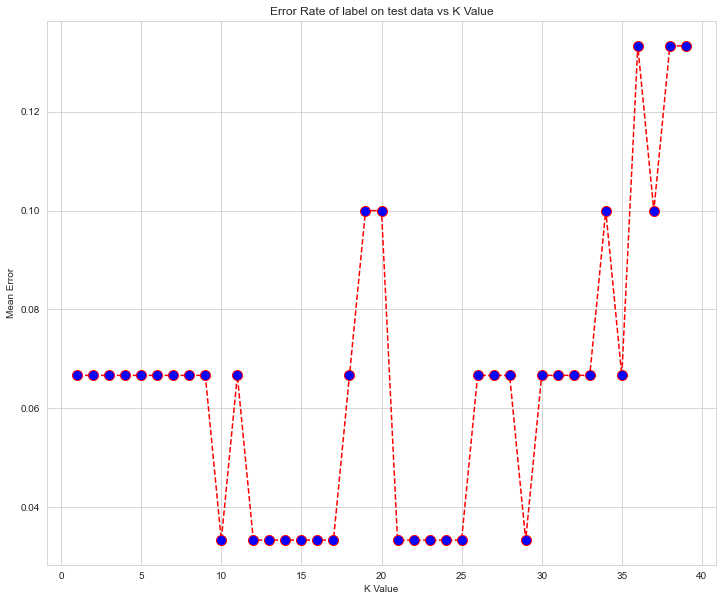

In [64]:
error_iris = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn_classifier_iris = KNeighborsClassifier(n_neighbors=i)
    knn_classifier_iris.fit(X_train, y_train)
    y_pred = knn_classifier_iris.predict(X_test)
    error_iris.append(np.mean(y_pred != y_test))
 
        
plt.figure(figsize=(12, 10))
plt.plot(range(1, 40), error_iris, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate of label on test data vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


#### K-NN for classification of iris dataset with n-neighbors=5

In [63]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Instantiate learning model (k = 5)
classifier_iris = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier_iris.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_iris.predict(X_test)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [64]:
from sklearn.metrics import classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[ 8  0  0]
 [ 0  9  0]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      1.00      0.90         9
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



#### Normalize the input dataset

In [60]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(X)
# Instantiate learning model (k = 3)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(normalized_data, y, test_size=0.20)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train_no, y_train_no)

# Predicting the Test set results
y_pred_no= classifier.predict(X_test_no)

In [61]:
from sklearn.metrics import classification_report
print("Confusion Matrix\n",confusion_matrix(y_test_no, y_pred_no))
print(classification_report(y_test_no, y_pred_no))

Confusion Matrix
 [[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Using PCA for iris dataset,then the performance of K-NN 

In [12]:
from sklearn.preprocessing import StandardScaler
X_std_trans = StandardScaler().fit_transform(Iris)
X_PCA_covariance_matrix = np.cov(X_std_trans.T)
X_PCA_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [13]:
Eigenvalues, Eigenvectors = np.linalg.eig(X_PCA_covariance_matrix)
print('Eigenvalues:  \n', Eigenvalues)
print('Eigenvectors: \n', Eigenvectors)

Eigenvalues:  
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [14]:

Eig_pairs = [(np.abs(Eigenvalues[i]), Eigenvectors[:,i]) for i in range(len(Eigenvalues))]

Eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in Eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199996
0.9201649041624885
0.147741821044948
0.020853862176462127


In [15]:
V_trans_matrix = np.hstack((Eig_pairs[0][1].reshape(4,1),
                      Eig_pairs[1][1].reshape(4,1),
                      Eig_pairs[2][1].reshape(4,1),
                      Eig_pairs[3][1].reshape(4,1)))
V_trans_matrix

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [16]:
# Four principal component
Four_principal_component = X_std_trans.dot(V_trans_matrix)
Four_principal_component[0:5]

array([[-2.26470281, -0.4800266 , -0.12770602,  0.0241682 ],
       [-2.08096115,  0.67413356, -0.23460885,  0.10300677],
       [-2.36422905,  0.34190802,  0.04420148,  0.02837705],
       [-2.29938422,  0.59739451,  0.09129011, -0.06595556],
       [-2.38984217, -0.64683538,  0.0157382 , -0.03592281]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Four_principal_component,y , test_size=0.20)
# Instantiate learning model (k = 3)
classifier_iris_pca = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier_iris_pca.fit(X_train, y_train)

# Predicting the Test set results
# Predicting the Test set results
y_pred = classifier_iris_pca.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[14  0  0]
 [ 0  6  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      1.00      0.92         6
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



####  k-cross validation

In [19]:
# creating list of K for KNN
list_neighbors = list(range(1,50,2))
# creating list of cv scores
cross_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# perform 10-fold cross validation
for k in list_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_scores.append(scores.mean())

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with 

<Figure size 432x288 with 0 Axes>

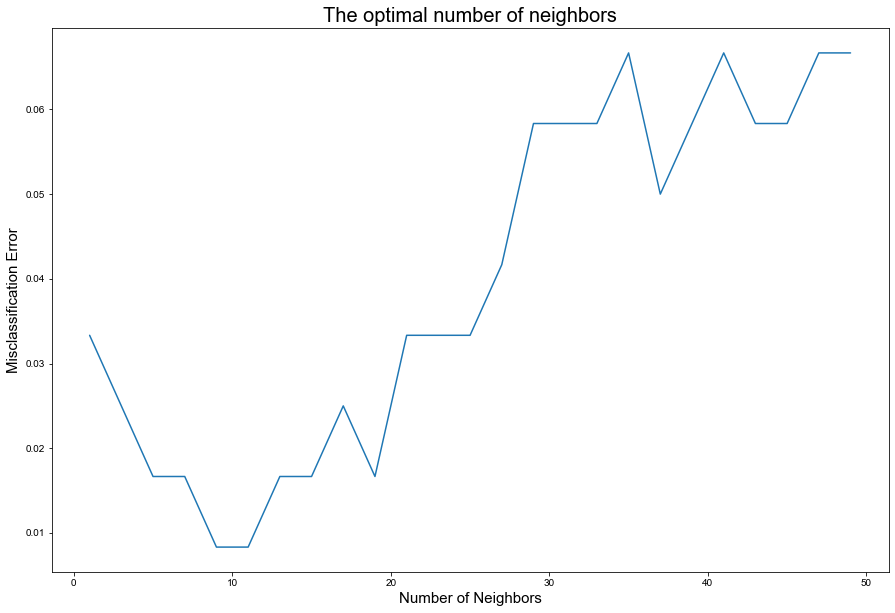

In [20]:
import seaborn as sns
# changing to misclassification error
MSE = [1 - x for x in cross_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='normal')
plt.xlabel('Number of Neighbors', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(list_neighbors, MSE)

plt.show()

In [21]:
# Instantiate learning model (k = 3)
classifier_iris_kcross = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier_iris_kcross.fit(X_train, y_train)

# Predicting the Test set results
# Predicting the Test set results
y_pred = classifier_iris_kcross.predict(X_test)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [22]:

print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.83      0.91        12
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



#### Leave One Out

In [23]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
cv_loo = LeaveOneOut()
scores = cross_val_score(lda, X_train, y_train, cv=cv_loo)
scores.mean() 

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with 

0.9916666666666667

### 1.2 Accelerometer

In [4]:
import pandas as pd
data_accele=pd.read_csv('./accelerometer.csv')
data_accele.head()


,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [6]:
from sklearn.preprocessing import LabelEncoder
feature_columns = ['pctid', 'x','y','z']
X_acce=data_accele[feature_columns].values
y_acce=data_accele['wconfid'].values
le = LabelEncoder()
y_acce1 = le.fit_transform(y_acce)

In [25]:
X_acce=data_accele['wconfid'].values.reshape(-1,1)
y_acce=data_accele['pctid'].values.reshape(-1,1)
X_acce

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

In [7]:
# K=4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_acce, y_acce1, test_size=0.20)
# Instantiate learning model (k = 4)
classifier_acce = KNeighborsClassifier(n_neighbors=4)

# Fitting the model
classifier_acce.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_acce.predict(X_test)

In [9]:
from sklearn.metrics import classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[7287 2188  736]
 [3707 5823  766]
 [ 832  802 8459]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.66     10211
           1       0.66      0.57      0.61     10296
           2       0.85      0.84      0.84     10093

    accuracy                           0.70     30600
   macro avg       0.71      0.71      0.70     30600
weighted avg       0.71      0.70      0.70     30600



In [11]:
# K=5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_acce, y_acce1, test_size=0.20)
# Instantiate learning model (k = 5)
classifier_acce = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier_acce.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_acce.predict(X_test)

In [12]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[6582 2815  788]
 [2877 6696  733]
 [ 737  704 8668]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     10185
           1       0.66      0.65      0.65     10306
           2       0.85      0.86      0.85     10109

    accuracy                           0.72     30600
   macro avg       0.72      0.72      0.72     30600
weighted avg       0.72      0.72      0.72     30600



#### Normalize the input dataset

In [19]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(X_acce)
# Instantiate learning model (k = 5)
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y_acce1, test_size=0.20)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [20]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[5902 3321  977]
 [3234 6072  774]
 [ 844  723 8753]]
              precision    recall  f1-score   support

           0       0.59      0.58      0.58     10200
           1       0.60      0.60      0.60     10080
           2       0.83      0.85      0.84     10320

    accuracy                           0.68     30600
   macro avg       0.67      0.68      0.68     30600
weighted avg       0.68      0.68      0.68     30600



#### Comparing Error Rate with the K Value

Text(0, 0.5, 'Mean Error')

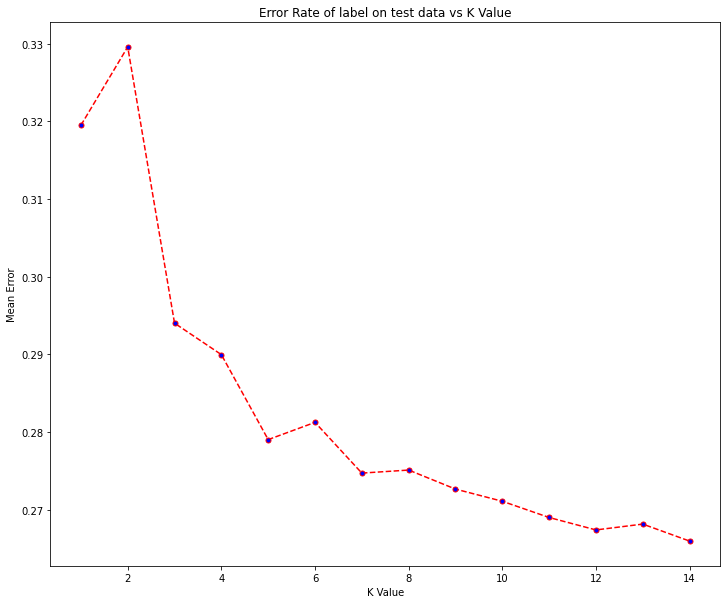

In [25]:

error_acce = []
X_train, X_test, y_train, y_test = train_test_split(X_acce, y_acce1, test_size=0.20)

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn_classifier_acce = KNeighborsClassifier(n_neighbors=i)
    knn_classifier_acce.fit(X_train, y_train)
    y_pred = knn_classifier_acce.predict(X_test)
    error_acce.append(np.mean(y_pred != y_test))
    
plt.figure(figsize=(12, 10))
plt.plot(range(1, 15), error_acce, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate of label on test data vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### Using PCA for accelerometer dataset,then the performance of K-NN 

In [26]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data_accele)
# Covarance matrix
X_covariance_matrix=np.cov(X_std.T)
X_covariance_matrix

# eignvalues eignvector
Eigenvalues, Eigenvectors = np.linalg.eig(X_covariance_matrix)
print('Eigenvalues %s \n' %Eigenvalues)
print('Eigenvectors \n%s\n' %Eigenvectors)


Eigenvalues [1.10307152 0.90782481 0.98441269 1.00401092 1.00071274] 

Eigenvectors 
[[-0.03727795  0.02523764 -0.40979266  0.76852115  0.48930424]
 [-0.03628142 -0.08698171 -0.21728163  0.43752949 -0.86745287]
 [ 0.66406168  0.69453611 -0.254733   -0.07949737 -0.07370854]
 [ 0.31503654  0.05592847  0.83103962  0.45496234  0.00253047]
 [-0.6760681   0.71153977  0.17129775  0.06806344 -0.05164814]]



In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(Eigenvalues[i]), Eigenvectors[:,i]) for i in range(len(Eigenvalues))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.103071524005504
1.0040109166871491
1.0007127398403595
0.9844126931210018
0.9078248062981319


In [28]:
W_matrix = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1)))
W_matrix

array([[-0.03727795,  0.76852115],
       [-0.03628142,  0.43752949],
       [ 0.66406168, -0.07949737],
       [ 0.31503654,  0.45496234],
       [-0.6760681 ,  0.06806344]])

In [29]:
Y_acce = X_std.dot(W_matrix)
Y_acce[0:5]

array([[ 0.15745795, -1.60567644],
       [ 0.1010347 , -1.68716049],
       [ 0.12219696, -1.6015548 ],
       [ 0.1032796 , -1.66656357],
       [ 0.10382637, -1.66968116]])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y_acce,y_acce1, test_size=0.20)
# Instantiate learning model (k = 5)
classifier_acce_pca = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier_acce_pca.fit(X_train, y_train)

# Predicting the Test set results
# Predicting the Test set results
y_pred = classifier_acce_pca.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[9154 1220   48]
 [ 838 8918  367]
 [   0   66 9989]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     10422
           1       0.87      0.88      0.88     10123
           2       0.96      0.99      0.98     10055

    accuracy                           0.92     30600
   macro avg       0.92      0.92      0.92     30600
weighted avg       0.92      0.92      0.92     30600



####  k-cross validation

In [33]:
# creating list of K for KNN
list_neighbors = list(range(1,10,2))
# creating list of cv scores
cross_scores = []
X_train, X_test, y_train, y_test = train_test_split(X_acce, y_acce1, test_size=0.20)
# perform 10-fold cross validation
for k in list_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

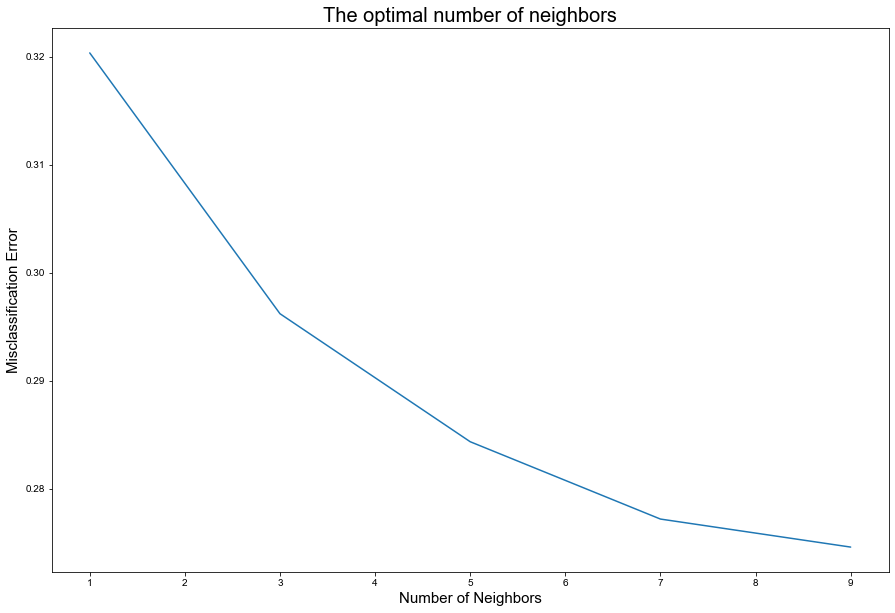

In [34]:
import seaborn as sns
# changing to misclassification error
MSE = [1 - x for x in cross_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='normal')
plt.xlabel('Number of Neighbors', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(list_neighbors, MSE)

plt.show()

In [35]:
# Instantiate learning model (k = 5)
classifier_iris_kcross = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier_iris_kcross.fit(X_train, y_train)

# Predicting the Test set results
# Predicting the Test set results
y_pred = classifier_iris_kcross.predict(X_test)

In [36]:

print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[6583 2751  828]
 [2742 6605  771]
 [ 755  788 8777]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     10162
           1       0.65      0.65      0.65     10118
           2       0.85      0.85      0.85     10320

    accuracy                           0.72     30600
   macro avg       0.72      0.72      0.72     30600
weighted avg       0.72      0.72      0.72     30600



#### Leave One Out

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X_acce, y_acce1, test_size=0.20)
lda = LinearDiscriminantAnalysis()
cv_loo = LeaveOneOut()
scores = cross_val_score(lda, X_train, y_train, cv=cv_loo)
scores.mean() 

### 1.3 